In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

#각 열 이름에 해당하는 질문
question = pd.read_csv('C:/Users/user/Desktop/Kaggle_survey/schema.csv')
#객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답(16716명 응답)
mcq = pd.read_csv('C:/Users/user/Desktop/Kaggle_survey/multipleChoiceResponses.csv', 
                  encoding="ISO-8859-1", low_memory=False)

## Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?


In [2]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [3]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [4]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [5]:
s = s[s != 'nan']

In [6]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장많고, 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음이고 적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음이다.

## Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?

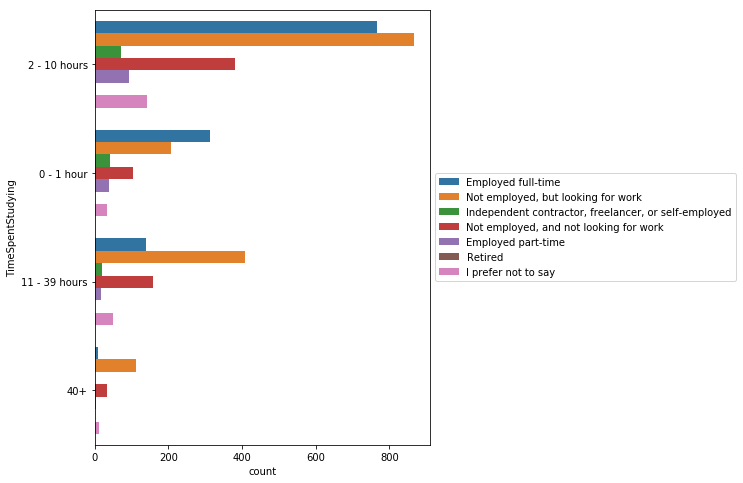

In [7]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

In [9]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


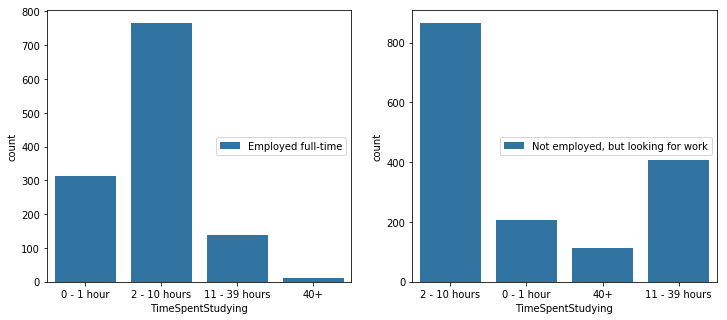

In [10]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

## Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [11]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [12]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [13]:
s = s[s != 'nan'].value_counts().head(20)

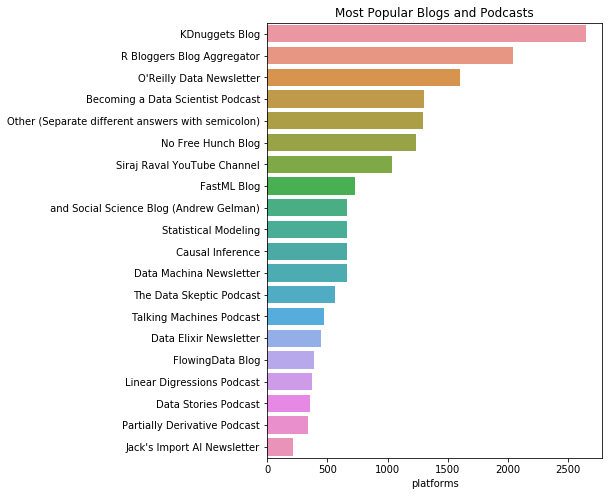

In [14]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter 가 가장 유용하다고 투표를 받았다.
데이터 사이언스 되기라는 팟캐스트도 유명한 듯 하다.

* [Machine Learning, Data Science, Big Data, Analytics](https://www.kdnuggets.com/)

* [Becoming a Data Scientist - YouTube - YouTube](https://www.youtube.com/channel/UCfxnrdBM1YRV9j2MB8aiy4Q)

* [Siraj Raval - YouTube - YouTube](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A)


In [15]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [16]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [17]:
t = t[t != 'nan'].value_counts()

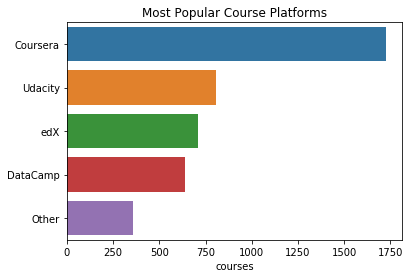

In [18]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t) #1위는 유명한 머신러닝 강의

Coursera와 Udacity가 가장 인기있는 플랫폼이다.

## Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [19]:
job_features = [
    x for x in mcq.columns if x.find(
        'JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [20]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [21]:
jdf = pd.DataFrame(jdf).transpose() #x축 y축 바꾸기
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


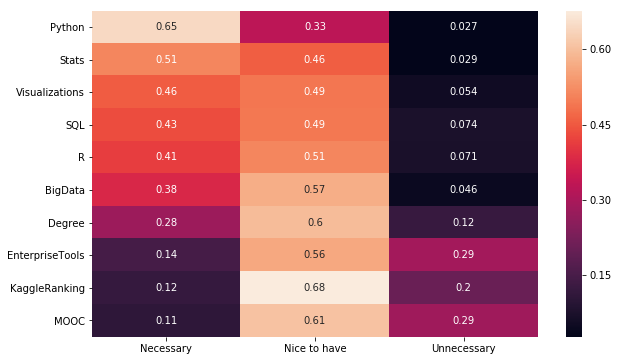

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", 
                            ascending=False), annot=True) #통계학이 2위!!!

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

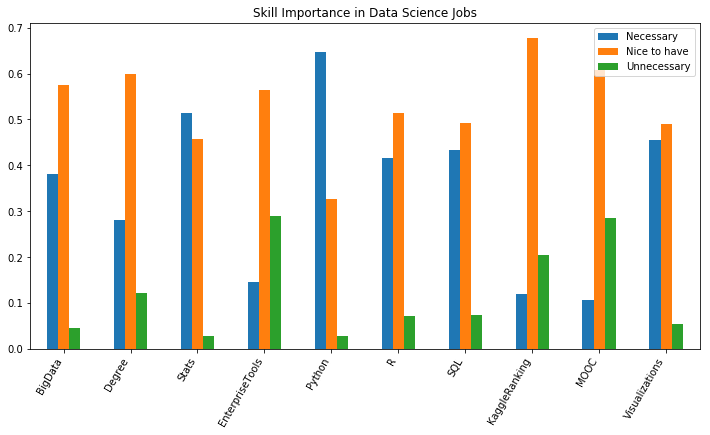

In [23]:
jdf.plot(kind='bar', figsize=(12,6), 
         title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

꼭 필요한 것으로 Python, R, SQL, 통계, 시각화가 있다.

있으면 좋은 것은 빅데이터, 학위, 툴 사용법, 캐글랭킹, 무크가 있다.

## Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [24]:
mcq[mcq['CompensationAmount'].notnull()].shape #null 제외

(5224, 228)

In [25]:
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','') #숫자로 바꾸기 위해 ,없앰
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','') #숫자로 바꾸기 위해 -없앰

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('C:/Users/user/Desktop/Kaggle_survey/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[
    ['CompensationAmount','CompensationCurrency',
     'GenderSelect',
     'Country',
     'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate'] #환율로 USD기준으로 계산
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [26]:
print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


가장 큰 수치는 여러 국가들의 GDP보다 크다고 한다. 가짜 응답이며, 평균급여는 USD $ 53,812 이다. 그래프를 좀 더 잘 표현하기 위해 50만불 이상의 데이터만 distplot으로 그려봤다.

Text(0.5, 1.0, 'Salary Distribution')

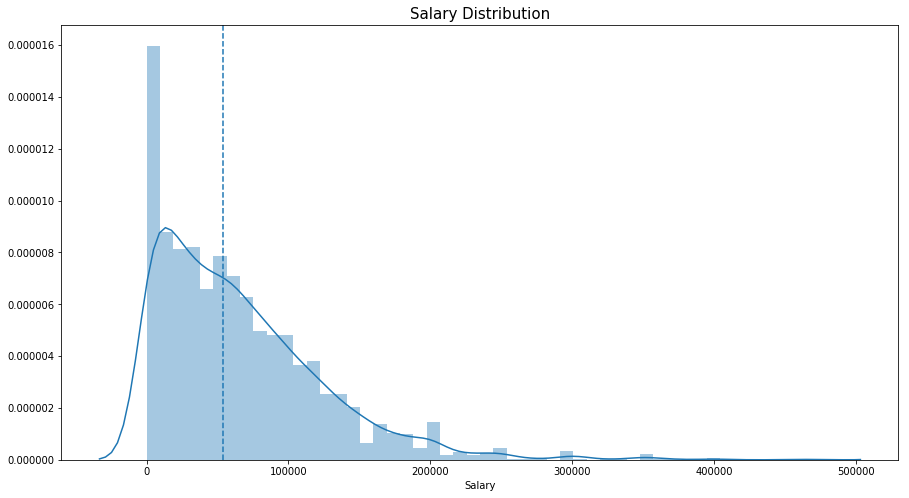

In [28]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed') #미디언에 선그어주기
plt.title('Salary Distribution',size=15) #0이 많음

Text(0.5, 1.0, 'Highest Salary Paying Countries')

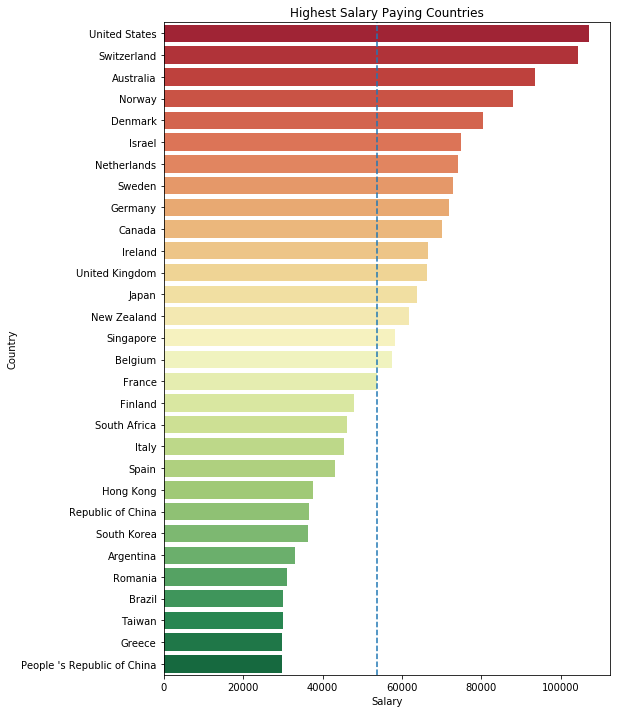

In [29]:
#국가별 임금
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()#30개까지 찍기

sns.barplot('Salary', 
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

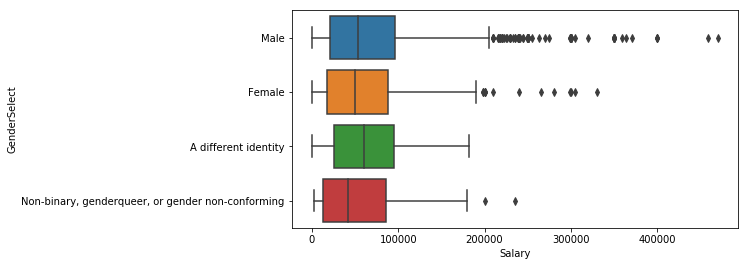

In [30]:
#성별 별 임금
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary) #차이가 커보이진 않으나 높은 임금을 받는 남자가 많음

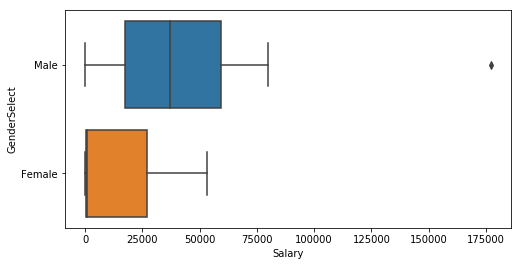

In [31]:
#우리나라의 임금격차
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea) #커보임,응답수가 적었다는 것 주의

In [32]:
salary_korea.shape

(26, 8)

In [33]:
salary_korea[salary_korea['GenderSelect'] == 'Female'] #3명 뿐인데 그나마도 잘못입력한 듯

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [34]:
salary_korea_male = salary_korea[
    salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [35]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


## Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [36]:
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
    )

In [37]:
q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [38]:
q = q[q != 'nan'].value_counts()

In [39]:
pd.DataFrame(q) #Socrata!, 스스로 스크래핑

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


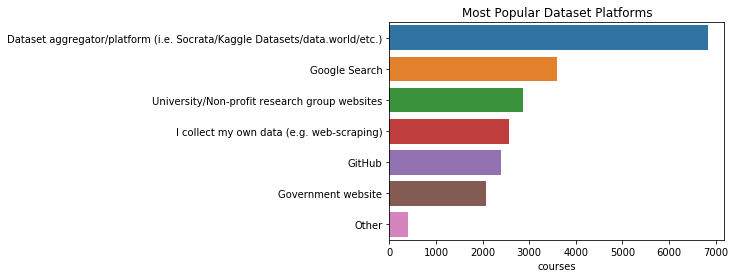

In [40]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

Kaggle 및 Socrata는 개인 프로젝트나 학습에 사용하기 위한 데이터를 얻는데 인기있는 플랫폼이다. Google 검색 및 대학 / 비영리 단체 웹 사이트는 각각 2위와 3위에 있다. 그리고 직접 웹스크래핑 등을 통해 데이터를 수집한다고 한 응답이 4위다.

In [41]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('C:/Users/user/Desktop/Kaggle_survey/freeformResponses.csv', 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [42]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

#### 개인프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점은 무엇일까?

In [43]:
ppcff = ff[
    'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
-,9
Size,9


대부분 데이터를 정제하는일이라고 응답하였고 그 다음이 데이터 크기다.

## Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [50]:
time_features = [
    x for x in mcq.columns if x.find('Time') != -1]

In [51]:
time_features

['LearningDataScienceTime',
 'TimeSpentStudying',
 'EmployerMLTime',
 'WorkMethodsFrequencyTimeSeriesAnalysis',
 'TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect',
 'JobHuntTime']

In [52]:
time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

In [53]:
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



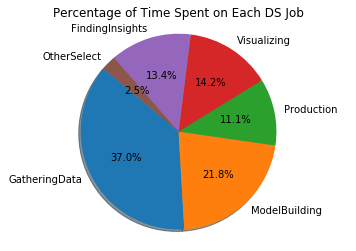

In [54]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

데이터를 수집하는 일이 37%로 업무의 가장 큰 비중을 차지하고 그 다음으로 모델을 구축하고 시각화, 인사이트를 찾는 순이다.

## Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

In [56]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [57]:
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

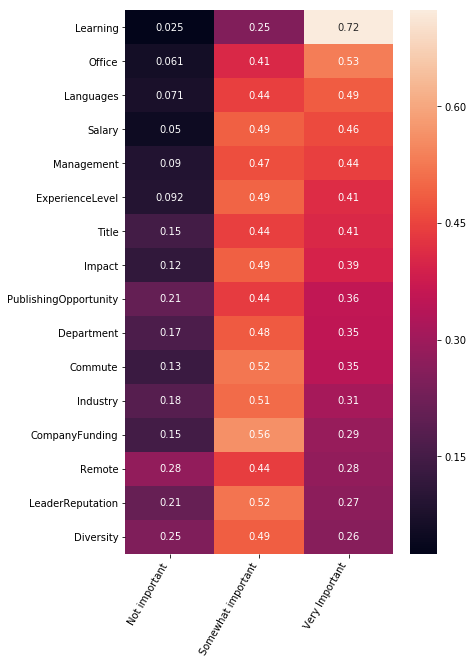

In [58]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True) #얼마나 배울 수 있는 곳인지가 제일 중요

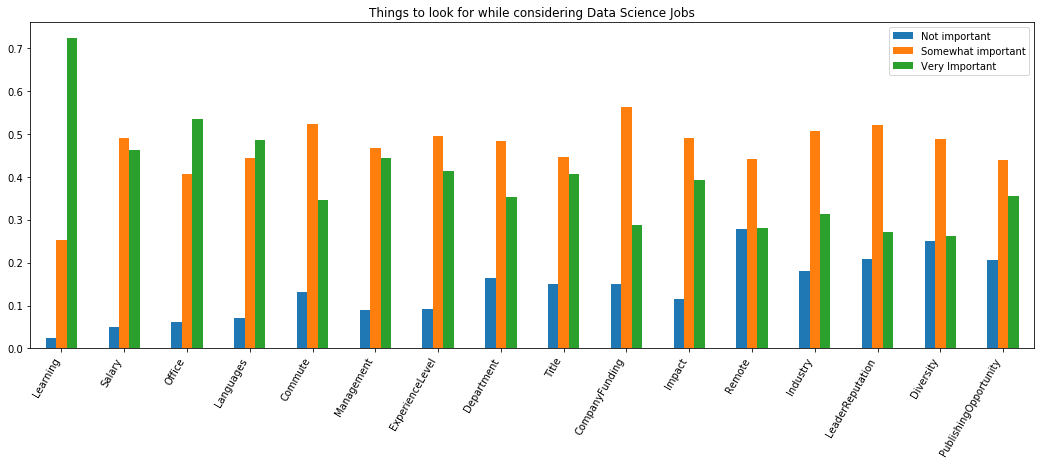

In [59]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

데이터 사이언티스트로 직업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크나 언어, 급여, 경영상태, 경력정도 순이다.

## Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요? 

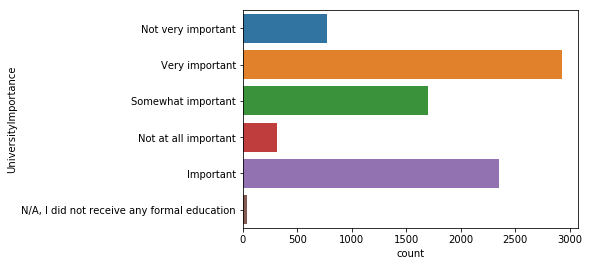

In [60]:
sns.countplot(y='UniversityImportance', data=mcq)

In [61]:
#연령대 별로 보기
import plotly.offline as py #설치하기
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age') #20,30,40대 대학교육 중요하다

ModuleNotFoundError: No module named 'plotly'

마치 연령대 그래프를 찍어 본것과 같은 형태의 그래프다.
20~30대는 대학 학위가 매우 중요하다고 생각하며, 연령대가 높은 응답자들은 그다지 중요하지 않다고 응답했다. 300명 미만의 응답자만이 학위가 중요하지 않다고 생각한다.


대부분의 응답자가 석사와 박사인 것을 고려해 봤을 때 이는 자연스러운 응답이다.

## Q13. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [62]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

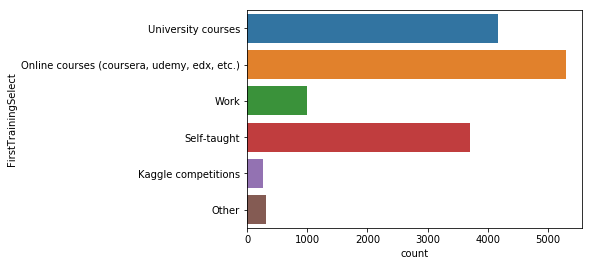

In [63]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

대부분의 응답자가 학사학위 이상으로 대학교육에 대한 중요성을 부여했지만,
가장 많은 응답자가 코세라, 유데미와 같은 온라인 코스를 통해 데이터 사이언스를 공부했고 그 다음으로 대학교육이 차지하고 있다.

개인프로젝트를 해보는 것도 중요하다고 답한 응답자가 제법 된다.

## Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

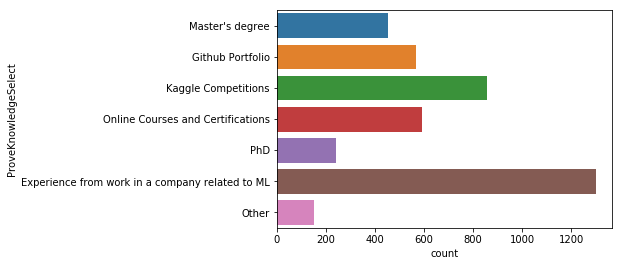

In [64]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq) #ML : Machine Learning

머신러닝과 관련 된 직무경험이 가장 중요하고 다음으로 캐글 경진대회의 결과가 중요하다고 답했다. 그리고 온라인 강좌의 수료증이나 깃헙 포트폴리오 순으로 중요하다고 답했다.

## Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

scikit과 같은 라이브러리는 세부 정보를 추상화하여 기본기술을 몰라도 ML 모델을 프로그래밍 할 수 있다. 그럼에도 그 안에 있는 수학을 아는 것이 중요할까?

In [65]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [66]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

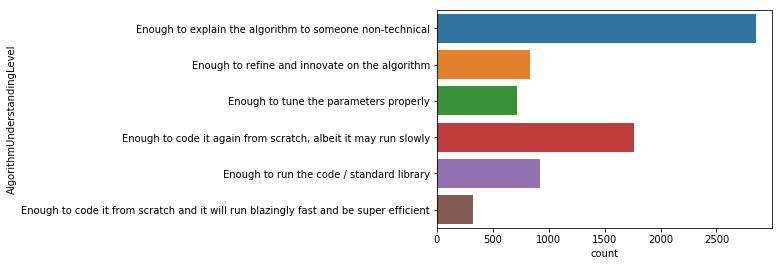

In [67]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다는 응답이 그 뒤를 잇는다.

##  Q16. 어디에서 일을 찾아야 할까요?

In [68]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')] #일하고 있는 사람과 배우고 있는 사람에게 물어봄

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


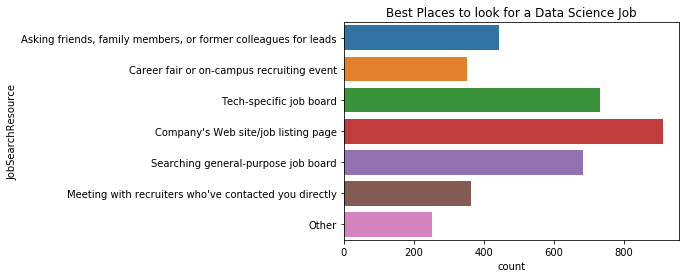

In [69]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

구직자들은 회사 웹사이트나 구직 사이트로부터 찾고 그 다음으로 특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용 정보를 얻는다.

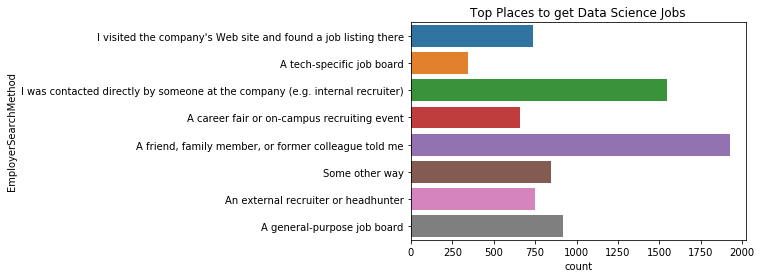

In [70]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq) #채용자들은 어디서?

위에서 구직자는 주로 구직사이트로 부터 채용정보를 가장 많이 찾았으나,
채용자는 친구, 가족, 이전 직장 동료 등의 추천을 통해 가장 많이 사람을 구하며 다음으로 리쿠르터나 특정 회사에 소속 된 사람에게 직접 연락을 해서 구하는 비율이 높다.

### 그럼 한국 사람들은 어떨까?

In [72]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

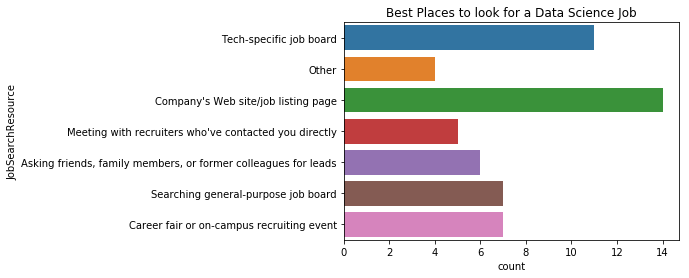

In [73]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea) #크게 다르지 않음

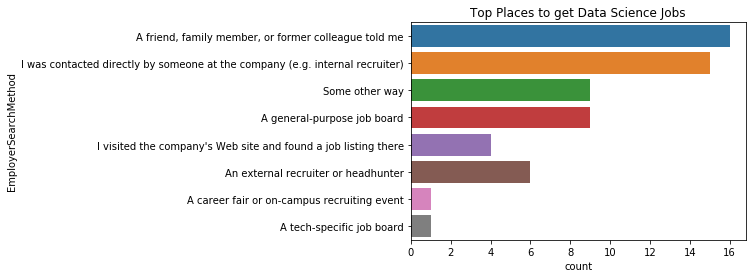

In [74]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea) #크게 다르지 않음

## 결론
* 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 데이터 수집과 정제는 어려운 일이다.(공감)
* 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.